### Indicator Simulation

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

Cite as: Pyrcz, M.J., 2024, Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy, https://geostatsguy.github.io/GeostatsPyDemos_Book. 

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of  **Categorical Indicator Simulation** with GeostatsPy for estimating spatial categorical features, e.g., like facies. 

* specifically we use kriging to make estimates on a grid to display as a map.

**YouTube Lecture**: check out my lectures on:

* [Kriging](https://youtu.be/CVkmuwF8cJ8?si=TzwmoF7QtppoITOv). 
* [Indicator Methods and Indicator Kriging](https://youtu.be/6mCfgbh7f2g?si=Rr6PcAbBgvhltCH-). 

For your convenience here's a summary of salient points.

Kriging is the geostatistical workhorse for:

1. Prediction away from wells, e.g. pre-sample assessments, interpolation and extrapolation.
2. Spatial cross validation.
3. Spatial uncertainty modeling.

First let's explain the concept of spatial estimation.

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

$$
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
$$

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

$$
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
$$

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

$$
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
$$

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

$$
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
$$

while satisfying the unbiasedness constraint.  

#### Kriging

Now the next question is what weights should we use?  

We could use equal weighting, $\lambda = \frac{1}{n}$, and the estimator would be the average of the local data applied for the spatial estimate. This would not be very informative.

We could assign weights considering the spatial context of the data and the estimate:

* **spatial continuity** as quantified by the variogram (and covariance function)
* **redundancy** the degree of spatial continuity between all of the available data with themselves 
* **closeness** the degree of spatial continuity between the available data and the estimation location

The kriging approach accomplishes this, calculating the best linear unbiased weights for the local data to estimate at the unknown location.  The derivation of the kriging system and the resulting linear set of equations is available in the lecture notes.  Furthermore kriging provides a measure of the accuracy of the estimate!  This is the kriging estimation variance (sometimes just called the kriging variance).

$$
\sigma^{2}_{E}(\bf{u}) = C(0) - \sum^{n}_{\alpha = 1} \lambda_{\alpha} C(\bf{u}_0 - \bf{u}_{\alpha})
$$

What is 'best' about this estimate? Kriging estimates are best in that they minimize the above estimation variance. 

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic. 
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

#### Indicator Formalism

Here we use indicator methods to estimate a categorical feature in space, but there are many more aspects of indicator methods that we could cover:

* Estimation and Simulation with categorical variables with explicit control of spatial continuity of each category
* Estimation and simulation with continuous variables with explicit control of the spatial continuity of different magnitudes
* Requires indicator coding of data, a probability coding based on category or threshold
* Requires indicator variograms to describe the spatial continuity.

If $I\{\bf{u} ;z_k \}$ is an indicator for a categorical variable, it is a probability of a realization equal to a category. We define the categorical indicator transform as: 

$$
I\{\bf{u} ;z_k \} =
\left\{ 
  \begin{array}{ c l }
    1 & \text{if} Z(\bf{u}) = z_k \\
    0 & \text{otherwise}
  \end{array}
\right.
$$

For example,

* given threshold, $𝑧_2 = 2$, and data at $\bf{ 𝐮 } _1$, $z(\bf{u} _1) = 2$, then $I\{\bf{u}_1 ;z_2 \} = 1$
* given threshold, $𝑧_1 = 1$, and a RV away from data at $\bf{ 𝐮 } _{iy = 10, ix = 5}$, $z(\bf{ 𝐮 } _{iy = 10, ix = 5}) = 0.25$

#### Indicator Kriging

Now we perform indicator kriging for each category, $z_k$ to estimate the probability of each category at each location.

$$
p^*_{IK}(\bf{ u }; k) = \sum_{\alpha = 1}^n \lambda_{\alpha} (k) \cdot I\{\bf{u} ;z_k \} + \left( 1 - \sum_{\alpha = 1}^n \lambda(k) \right) \cdot p(k)
$$

Normalization to force the results to sum to 1.0 is included for probability closure.

#### Spatial Simulation

This method is critical for:

1. Prediction away from wells, e.g. pre-drill assessments, with uncertainty 
2. Spatial uncertainty modeling.
3. Heterogeneity realizations ready for application to the transfer function.

#### Sequential Indicator Simulation

With sequential Gaussian simulation we build on indicator kriging by:

* sequential calculating the local categorical CDF

* simulating from the local categorical CDF my Monte Carlo simulation

* sequentially adding the simulated values as data to correct the covariance between the simulated values

The resulting model corrects the issues of kriging, as we now:

* reproduce the global feature categorical PDF / CDF, i.e., categorical proportions

* reproduce the global in indicator variograms

* while providing a model of uncertainty through multiple realizations

In this workflow we run kriging estimates and multiple simulation realizations, and compare the statistics.

#### Load the Required libraries

The following code loads the required libraries. 

In [3]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))  

GeostatsPy version: 0.0.72


We will also need some standard packages. These should have been installed with Anaconda 3.

In [5]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
import matplotlib as mpl                                      # custom colorbar
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Define Functions

This is a convenience function to add major and minor gridlines and a combine location map and pixelplot that has color maps and color bars to improve plot interpretability.

In [9]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  
    
def locpix_colormaps_st(array,xmin,xmax,ymin,ymax,step,vmin,vmax,df,xcol,ycol,vcol,title,xlabel,ylabel,vlabel_loc,vlabel,cmap_loc,cmap):
    xx, yy = np.meshgrid(
        np.arange(xmin, xmax, step), np.arange(ymax, ymin, -1 * step)
    )
    cs = plt.imshow(array,interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = vmin, vmax = vmax,cmap = cmap)
    plt.scatter(df[xcol],df[ycol],s=None,c=df[vcol],marker=None,cmap=cmap_loc,vmin=vmin,vmax=vmax,alpha=0.8,linewidths=0.8,
        edgecolors="black",)
    plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel); plt.xlim(xmin, xmax); plt.ylim(ymin, ymax)
    cbar_loc = plt.colorbar(orientation="vertical",pad=0.08,ticks=[0, 1],
            format=mticker.FixedFormatter(['Shale','Sand'])); cbar_loc.set_label(vlabel_loc, rotation=270,labelpad=20)
    cbar = plt.colorbar(cs,orientation="vertical",pad=0.05); cbar.set_label(vlabel, rotation=270,labelpad=20)
    return cs

#### Make Custom Colorbar

We make this colorbar to display our categorical, sand and shale facies.

In [12]:
cmap_facies = mpl.colors.ListedColormap(['grey','gold'])
cmap_facies.set_over('white'); cmap_facies.set_under('white')

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [15]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

* note the "nsample" variable is an option to randomly take only nsamples from the dataset.

    * this is not standard part of spatial estimation, but fewer data is easier to visualize given our grid size (we want multiple cells between the data to see the behavior away from data)

* note, I often remove unnecessary data table columns. This clarifies workflows and reduces the chance of blunders, e.g., using the wrong column!

In [18]:
nsample = 50                                                  # how many data to retain for speed and clear viz

df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv") # load the data from Dr. Pyrcz's GitHub 

df = df.sample(50,random_state = 73073)
df = df.reset_index()
df = df.iloc[:,2:6]                                           # remove unnecessary features

df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
df.head(n=3)                                                  # we could also use this command for a table preview 

,X,Y,Facies,Porosity
0,280.0,409.0,1.0,0.136716
1,230.0,749.0,1.0,0.204587
2,300.0,500.0,1.0,0.159891


#### Summary Statistics

Let's look at summary statistics for all facies combined:

In [21]:
df.describe().transpose()                                     # summary table of all facies combined DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
X,50.0,431.000000,260.801355,0.000000,222.500000,340.000000,680.000000,930.000000
Y,50.0,508.140000,276.122201,19.000000,264.000000,474.500000,729.000000,999.000000
Facies,50.0,0.580000,0.498569,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,50.0,0.123926,0.030533,0.062169,0.100742,0.122411,0.145025,0.204587


#### PDF and CDFs

Let's also look at the distributions, facies PDF and porosity CDF by facies. 

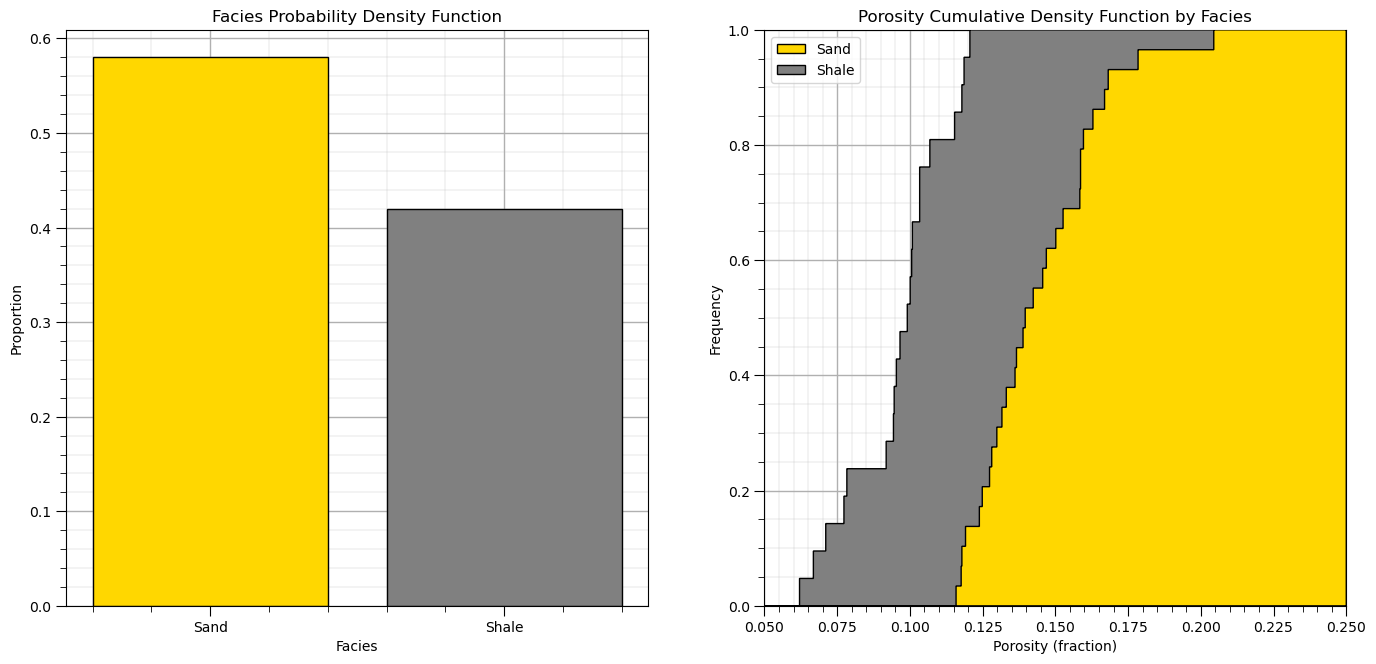

In [24]:
plt.subplot(121)
df['Facies_Names'] = np.where(df['Facies']==0,'Shale','Sand')
facies_counts = df['Facies_Names'].value_counts()/len(df); color = ['gold','grey']
plt.bar(x=['Sand','Shale'],height=facies_counts,color=color,edgecolor='black')
plt.ylabel('Proportion'); plt.xlabel('Facies'); plt.title('Facies Probability Density Function'); add_grid()

plt.subplot(122)                                              # plot original sand and shale porosity histograms
plt.hist(df_sand['Porosity'], facecolor='gold',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Sand',zorder=10)
plt.hist(df_shale['Porosity'], facecolor='grey',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=1.0,density=True,cumulative=True,edgecolor='black',label='Shale',zorder=9)
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left'); plt.title('Porosity Cumulative Density Function by Facies'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

For brevity we will omit data declustering from this workflow. We will assume declustered means for the porosity and permeability to apply with simple kriging.

#### Specify the Grid

Let's specify a reasonable grid to the estimation map.

* we balance detail and computation time. Note kriging computation complexity scales $O(n_{cell})$

* so if we half the cell size we have 4 times more grid cells in 2D, 4 times the runtime

In [46]:
xmin = 0.0; xmax = 1000.0                                     # range of x values
ymin = 0.0; ymax = 1000.0                                     # range of y values

xsiz = 10; ysiz = 10                                          # cell size
nx = 100; ny = 100                                            # number of cells
xmn = 5; ymn = 5                                              # grid origin, location center of lower left cell

pormin = 0.05; pormax = 0.22                                  # set feature min and max for colorbars

#### Sequential Indicator Simulation

Let's jump right to building a variety of models with simulation and visualizing the results. Here we specify the simulation model parameters:

* **ncut** - number of categories


In [49]:
ncut = 2                                                      # number of facies
thresh = [0,1]                                                # the facies categories (use consistent order for all lists)
gcdf = [0.4,0.6]                                              # the global proportions of the categories (shale, sand)
variomaj = 400.0; variomin = 100.0
varios = []                                                   # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # shale ind. vario.
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # sand ind. vario.
    
ndmin = 0; ndmax = 10                                         # minimum and maximum data for indicator kriging
nodmax = 10                                                   # maximum previously simulated nodes for indicator kriging
nxdis = 1; nydis = 1                                          # block kriging discretizations
dummy_trend = np.zeros((10,10))                               # current version requires trend - if wrong size = ignored 
tmin = -999; tmax = 999                                       # data trimming limits

 We will start with multiple realizations.  We will assume a variogram and use simple indicator kriging.

 * we assume stationary global proportions of each facies.

Data for IK3D: Variable column Facies
  Number   = 50
Setting up rotation matrices for variogram and search
Working on realization 0
   currently on node 0
   currently on node 2000
   currently on node 4000
   currently on node 6000
   currently on node 8000
   currently on node 10000
   currently on node 12000
   currently on node 14000
   currently on node 16000
   currently on node 18000


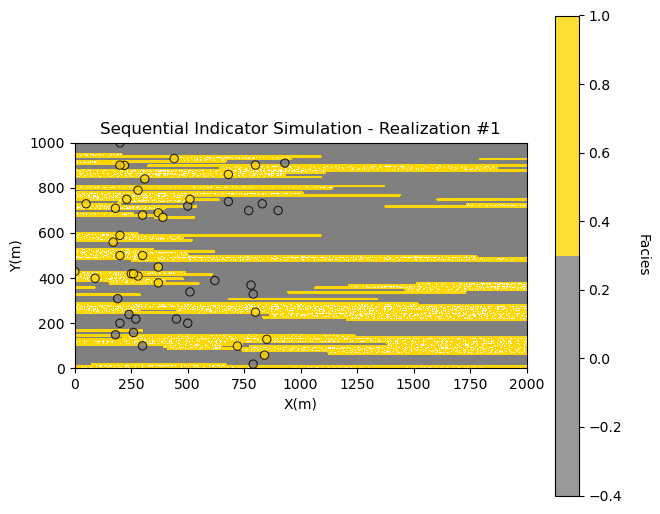

In [52]:
%%capture --no-display        

run_model = True                                              # run the simulation model
nreal = 9                                                     # number of realizations

if run_model == True:
    sim_ik = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nreal=nreal,nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,ktype=0,vario=varios)

nrow = int(round(((nreal+0.9)/3),0))                          # adjust plot for the number of realizations
for ireal in range(0,nreal):
    plt.subplot(nrow,3,ireal+1)                                  
    GSLIB.locpix_st(sim_ik[ireal],xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies',
                'Sequential Indicator Simulation - Realization #' + str(ireal+1),'X(m)','Y(m)','Facies',cmap_facies)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0*nrow, wspace=0.2, hspace=0.2); plt.show()

Observe the spatial continuity, relative proportions of facies and the conditioning to the available data. Let's confirm that the representative proportions from the data are honored (the global cdf of 40% shale and 60% sand).

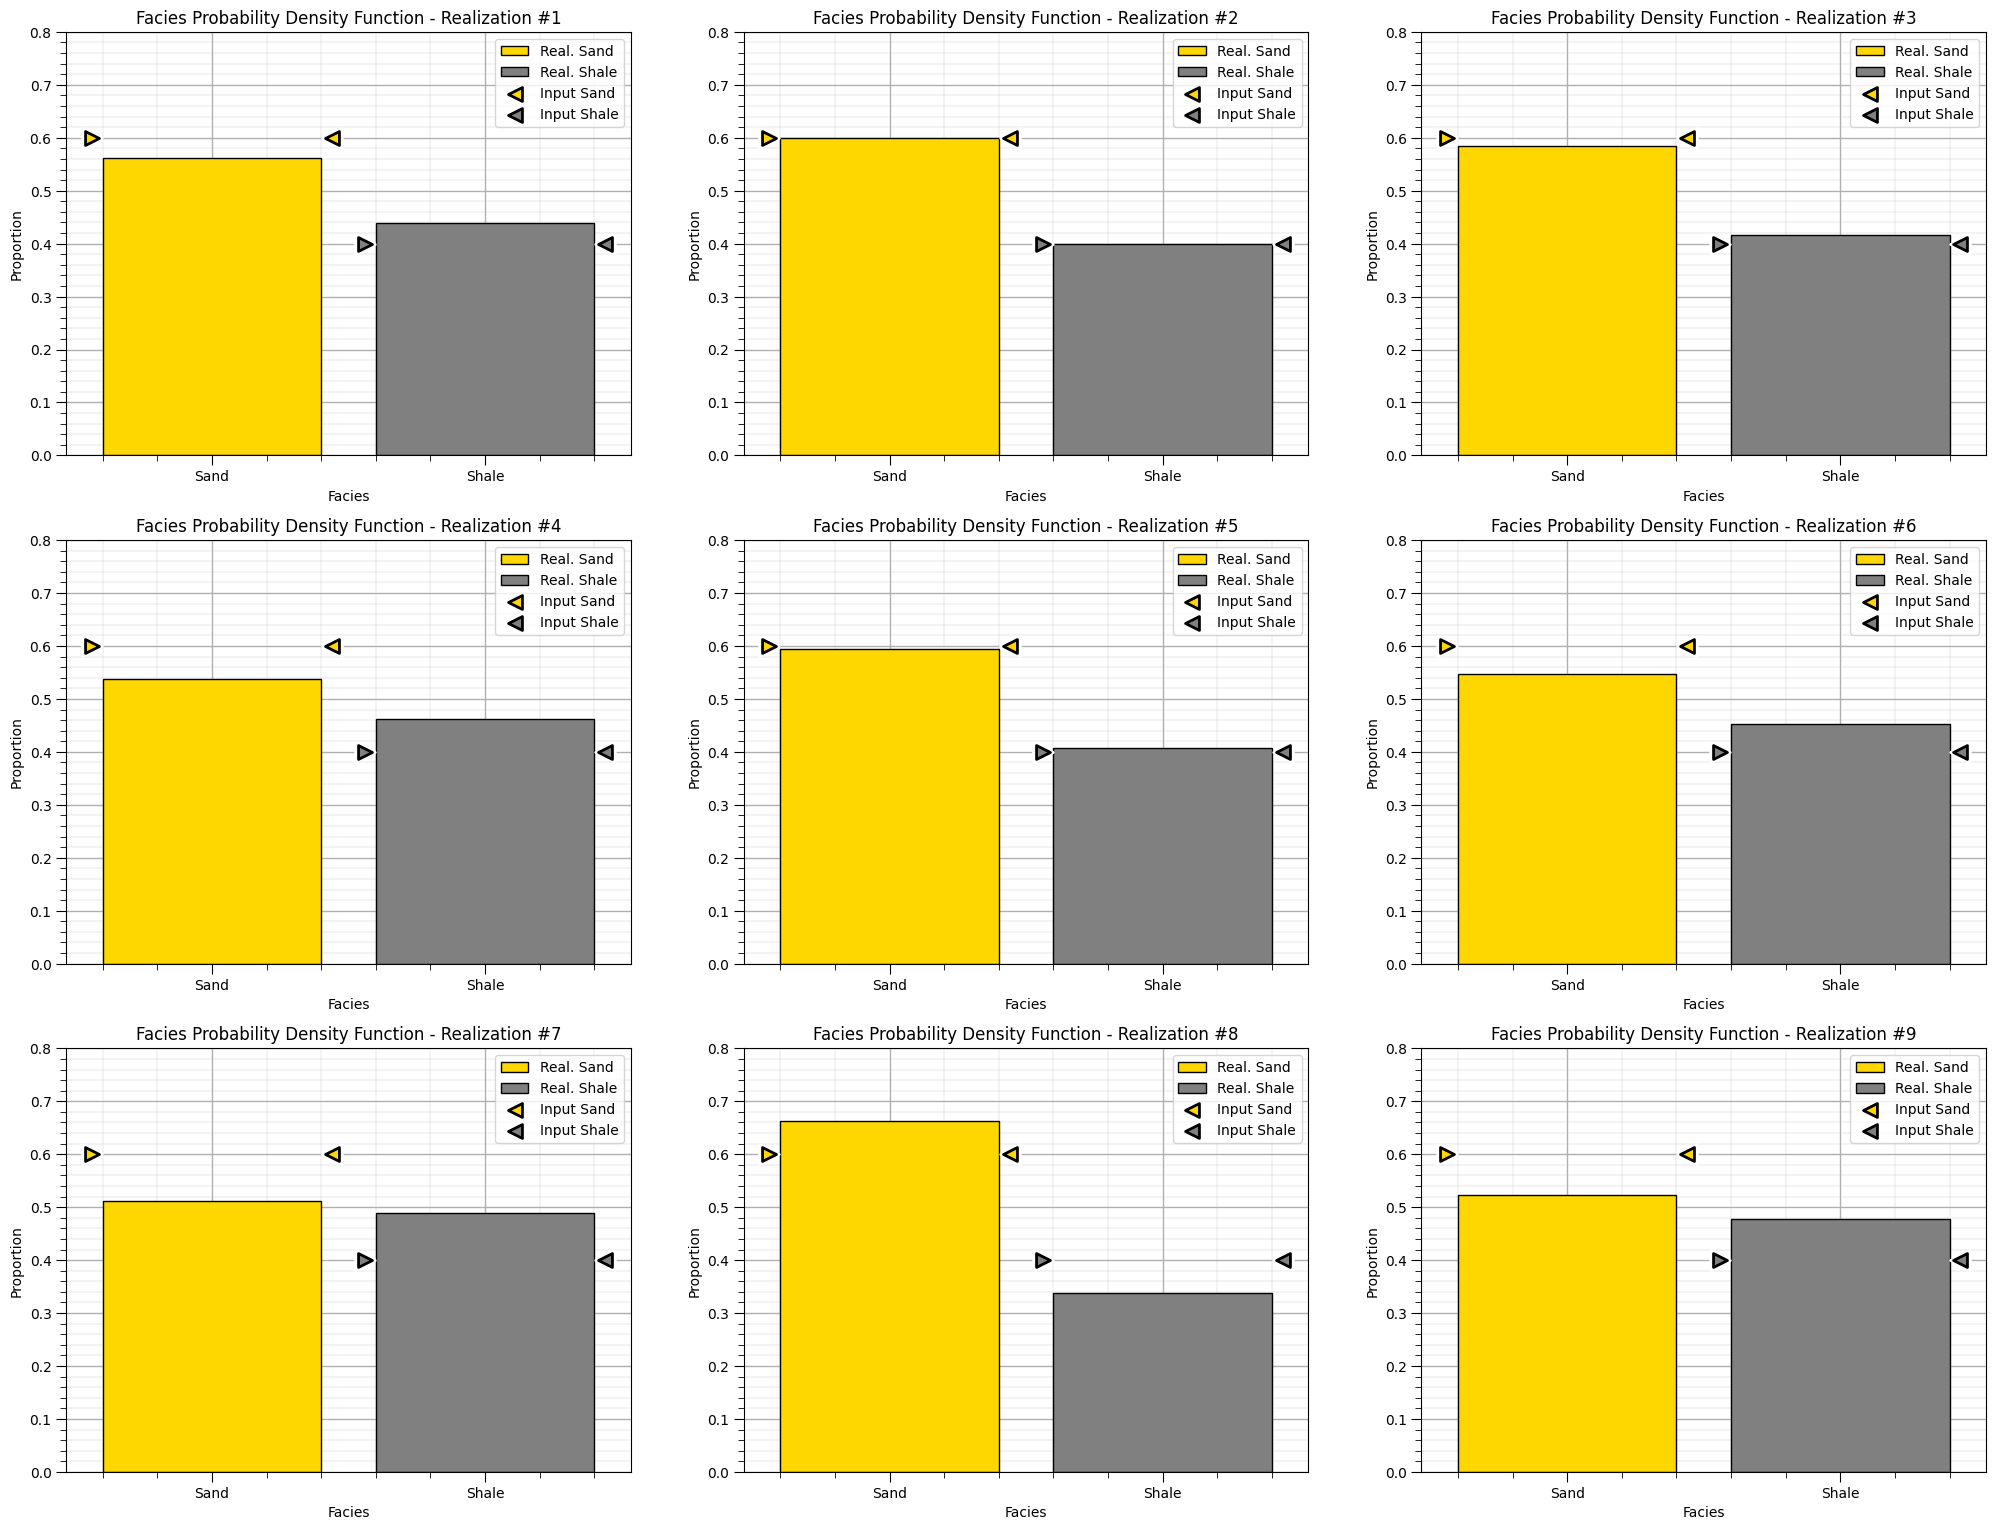

In [13]:
save = False

nrow = int(round(((nreal+0.9)/3),0))                          # adjust plot for the number of realizations
for ireal in range(0,nreal):
    plt.subplot(nrow,3,ireal+1)   
    prop = [np.average(sim_ik[ireal].flatten()),1.0 - np.average(sim_ik[ireal].flatten())]; color = ['gold','grey']
    plt.bar(x=['Sand','Shale'],height=prop,color=color,edgecolor='black',label=['Real. Sand','Real. Shale'])
    plt.ylabel('Proportion'); plt.xlabel('Facies'); 
    plt.title('Facies Probability Density Function - Realization #' + str(ireal + 1));
    plt.scatter([0.44],[gcdf[1]],color='gold',edgecolor='black',s=100,lw=2,marker='<',zorder=20,label='Input Sand')
    plt.scatter([-0.44],[gcdf[1]],color='gold',edgecolor='black',s=100,lw=2,marker='>',zorder=20)
    plt.scatter([0.44],[gcdf[1]],color='white',s=200,lw=2,marker='<',zorder=19)
    plt.scatter([-0.44],[gcdf[1]],color='white',s=200,lw=2,marker='>',zorder=19)  
    plt.scatter([1.44],[gcdf[0]],color='grey',edgecolor='black',s=100,lw=2,marker='<',zorder=20,label='Input Shale')
    plt.scatter([0.56],[gcdf[0]],color='grey',edgecolor='black',s=100,lw=2,marker='>',zorder=20)
    plt.scatter([1.44],[gcdf[0]],color='white',s=200,lw=2,marker='<',zorder=19)
    plt.scatter([0.56],[gcdf[0]],color='white',s=200,lw=2,marker='>',zorder=19)
    plt.legend(loc='upper right'); plt.ylim([0,0.8]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0*nrow, wspace=0.2, hspace=0.2)
if save == True:
    plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

Looks good, we have some ergodic fluctuations, but that is expected.

#### Changing the Global Stationary Categorical Proportions

Let's run three realizations and significantly change the global stationary proportions and then check the results.

* the global proportion is like the mean in simple kriging

* as we move away from data, there is more weight on the global proportion

Let's also shorten the variogram range to reduce the constraint of the data on the global proportion.

* I also decrease the number of data and previously simulated nodes to speed up the simulation 

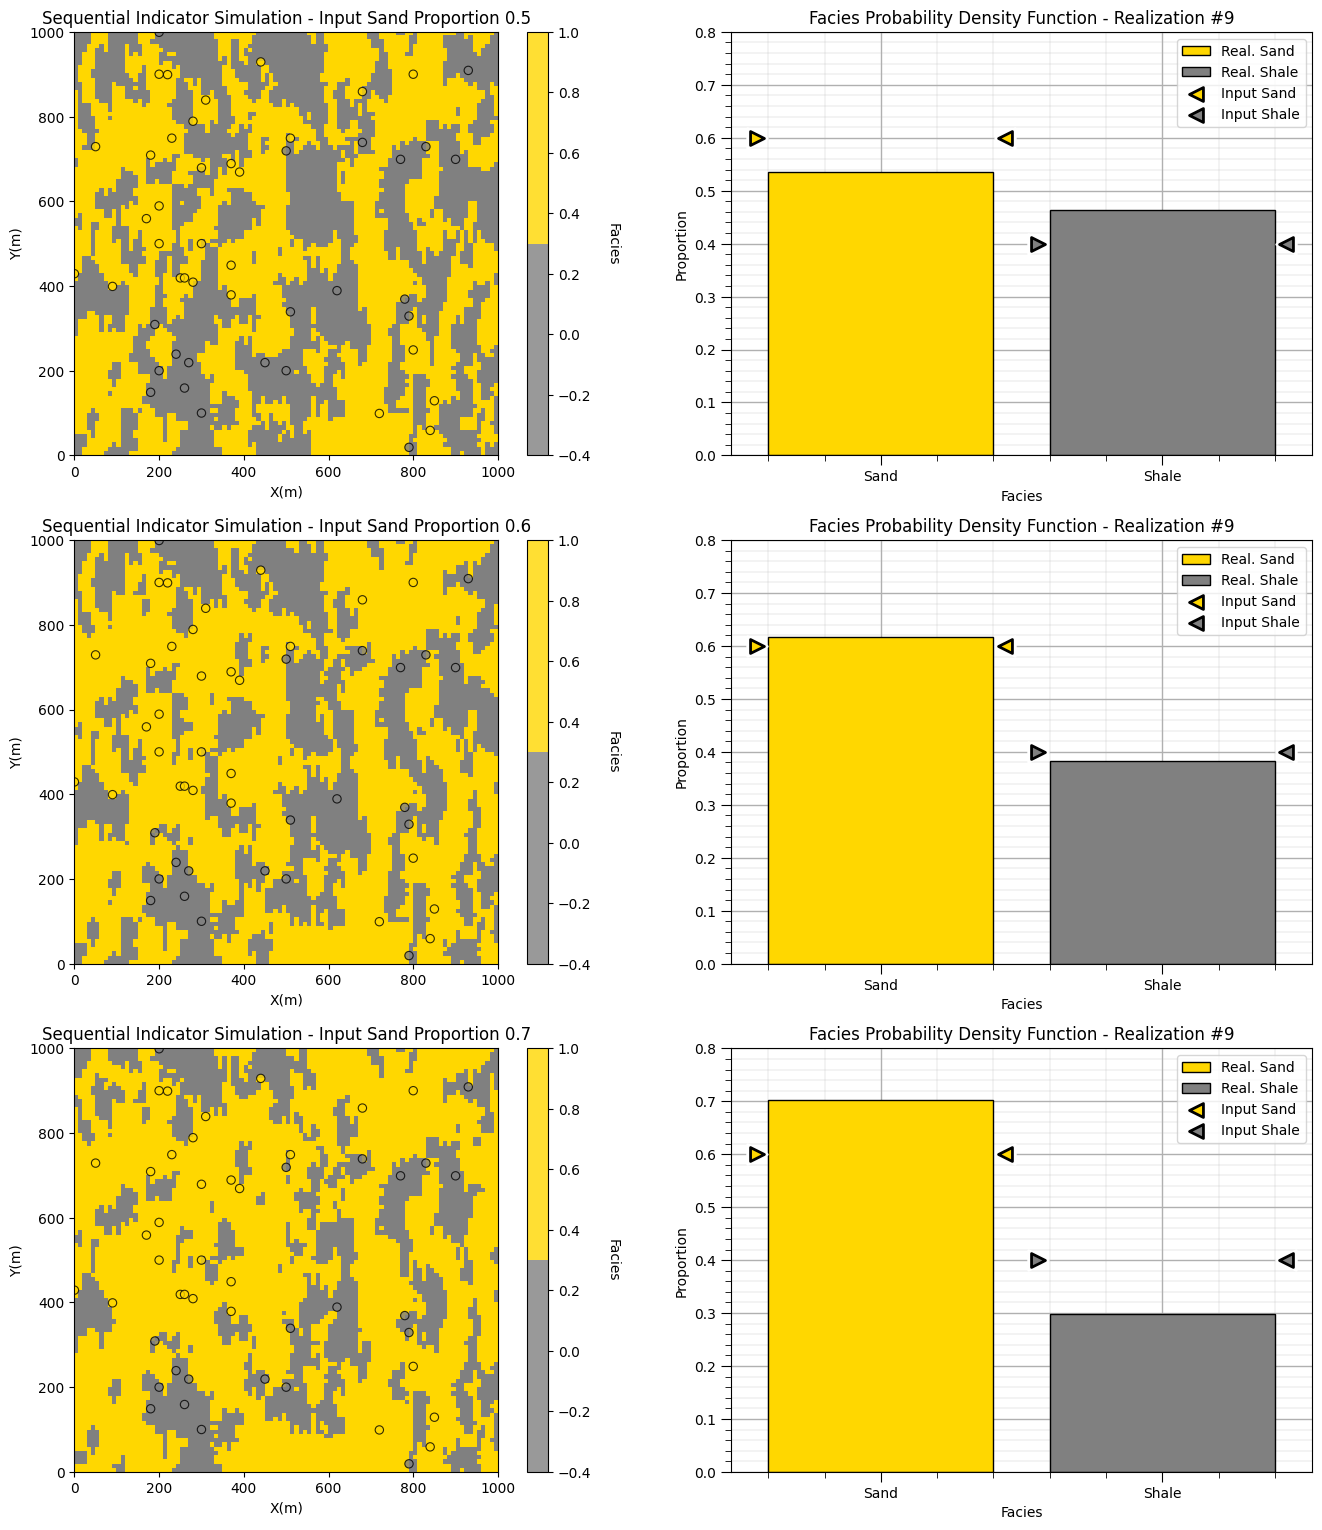

In [14]:
%%capture --no-display        

prop_sand = [0.5,0.6,0.7]                                      # proportion of sand cases
run_model = True                                               # run the simulation model

variomaj = 100.0; variomin = 50.0
varios = []                                                   # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # shale ind. vario.
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # sand ind. vario.
ndmin = 0; ndmax = 5                                          # minimum and maximum data for indicator kriging
nodmax = 5                                                    # maximum previously simulated nodes for indicator kriging

if run_model == True:
    sim_var_prop = np.zeros((len(prop_sand),ny,nx))
    for icase in range(0,len(prop_sand)):  
        gcdf_var = [1.0-prop_sand[icase],prop_sand[icase]]
        sisim = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf_var,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nreal=1,nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,ktype=0,vario=varios)[0]
        sim_var_prop[icase] = sisim
        
for icase in range(0,len(prop_sand)):
    plt.subplot(len(prop_sand),2,icase*2+1)                                  
    GSLIB.locpix_st(sim_var_prop[icase],xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies',
                'Sequential Indicator Simulation - Input Sand Proportion ' + str(prop_sand[icase]),'X(m)','Y(m)','Facies',cmap_facies)

    plt.subplot(len(prop_sand),2,icase*2+2) 
    prop = [np.average(sim_var_prop[icase].flatten()),1.0 - np.average(sim_var_prop[icase].flatten())]; color = ['gold','grey']
    plt.bar(x=['Sand','Shale'],height=prop,color=color,edgecolor='black',label=['Real. Sand','Real. Shale'])
    plt.ylabel('Proportion'); plt.xlabel('Facies'); 
    plt.title('Facies Probability Density Function - Realization #' + str(ireal + 1));
    plt.scatter([0.44],[gcdf[1]],color='gold',edgecolor='black',s=100,lw=2,marker='<',zorder=20,label='Input Sand')
    plt.scatter([-0.44],[gcdf[1]],color='gold',edgecolor='black',s=100,lw=2,marker='>',zorder=20)
    plt.scatter([0.44],[gcdf[1]],color='white',s=200,lw=2,marker='<',zorder=19)
    plt.scatter([-0.44],[gcdf[1]],color='white',s=200,lw=2,marker='>',zorder=19)  
    plt.scatter([1.44],[gcdf[0]],color='grey',edgecolor='black',s=100,lw=2,marker='<',zorder=20,label='Input Shale')
    plt.scatter([0.56],[gcdf[0]],color='grey',edgecolor='black',s=100,lw=2,marker='>',zorder=20)
    plt.scatter([1.44],[gcdf[0]],color='white',s=200,lw=2,marker='<',zorder=19)
    plt.scatter([0.56],[gcdf[0]],color='white',s=200,lw=2,marker='>',zorder=19)
    plt.legend(loc='upper right'); plt.ylim([0,0.8]); add_grid()
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=len(prop_sand), wspace=0.2, hspace=0.2); plt.show()

There may be a combination of ergodic fluctuations and control from the data.  

* if we have a high degree of spatial correlation and dense data the global proportions are constrained by the data.

#### Sequential Indicator Simulation with Ordinary Kriging

Now let's run a realization with ordinary kriging.

* relax the assumption of stationary facies proportions, by locally estimating the facies proportion.

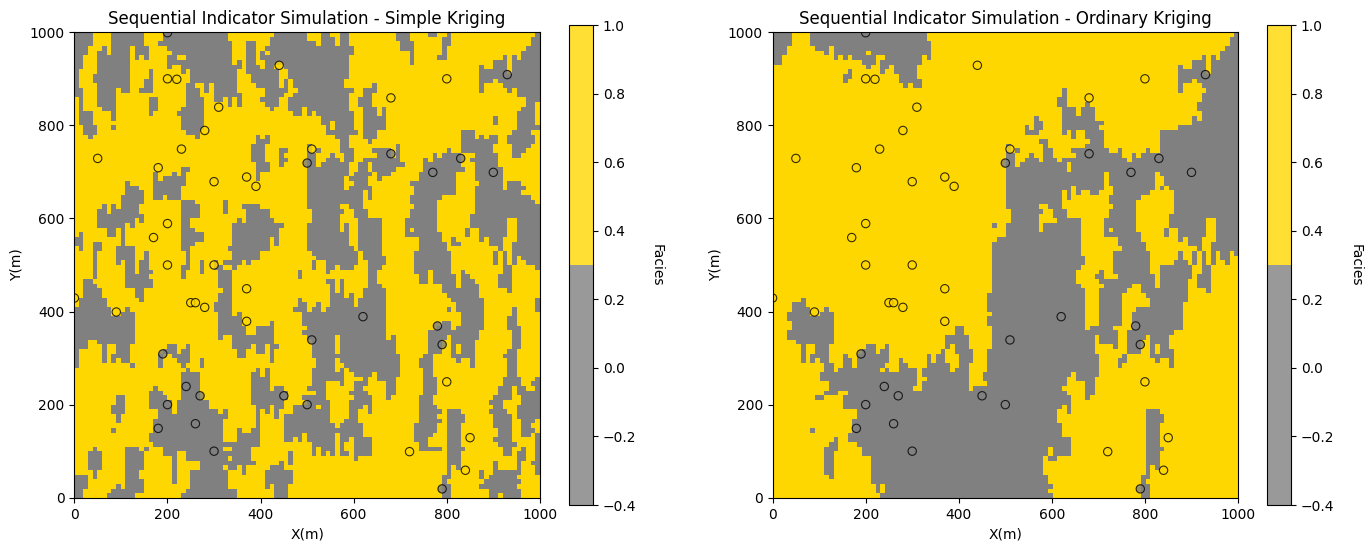

In [16]:
%%capture --no-display        

run_model = True                                               # run the simulation model

variomaj = 100.0; variomin = 50.0
varios = []                                                    # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # shale ind. vario.
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # sand ind. vario.
ndmin = 0; ndmax = 5                                           # minimum and maximum data for indicator kriging
nodmax = 5                                                     # maximum previously simulated nodes for indicator kriging


if run_model == True:
    sisim_sk = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nreal = 1,nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,ktype=0,vario=varios)[0]

    sisim_ok = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nreal = 1,nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,ktype=1,vario=varios)[0]


plt.subplot(121)                                               # plot the indicator simple kriging realization
GSLIB.locpix_st(sisim_sk,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Simple Kriging',
                'X(m)','Y(m)','Facies',cmap_facies)

plt.subplot(122)                                               # plot the indicator ordinary kriging realization
GSLIB.locpix_st(sisim_ok,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies','Sequential Indicator Simulation - Ordinary Kriging',
                'X(m)','Y(m)','Facies',cmap_facies)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Locally Variable Proportions / Categorical Trends

Next let's include a trend model, also called a locally variable proportion model in the case of categorical simulation. 

* We will make up a simple linear trend in X for demonstration. Note with kriging option 2 and a trend model with a ndarray of dimensions [ny,nx,ncut] the program will load the local proportion to apply to 1 - sum of the weights.  Note: this is not the trend / residual workflow in this first version of the program.  

We make no attempt to fit a trend to the data. 

* Let's just make up a trend model for demonstration. Here's our trend.

Global proportion of shale = 0.398
Global proportion of sand = 0.602


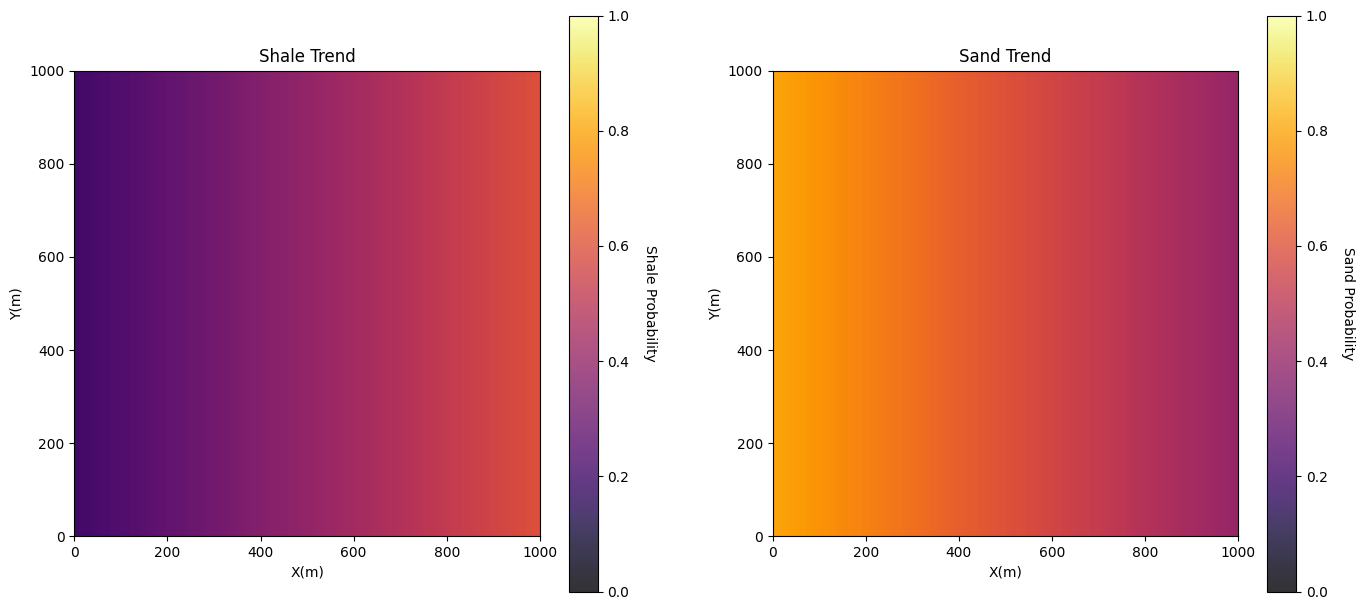

In [17]:
trend = np.zeros((nx,ny,ncut)); trend[:,:,0] = 0.4; trend[:,:,1] = 0.6
for iy in range(0,ny):
    for ix in range(0,nx):
        trend[iy,ix,0] = trend[iy,ix,0] + ((ix-50)/nx) * 0.4
        trend[iy,ix,1] = trend[iy,ix,1] - ((ix-50)/nx) * 0.4
        
trend = geostats.correct_trend(trend)

print('Global proportion of shale = ' + str(np.average(trend[:,:,0].flatten())) )
print('Global proportion of sand = ' +  str(np.average(trend[:,:,1].flatten())) )

plt.subplot(121)
GSLIB.pixelplt_st(trend[:,:,0],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Shale Trend','X(m)','Y(m)','Shale Probability',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(trend[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Sand Trend','X(m)','Y(m)','Sand Probability',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Before we run the simulation, let's go ahead and shorted the variogram range. This will allow us to see more influence from the trend (reduce the local data constraint).

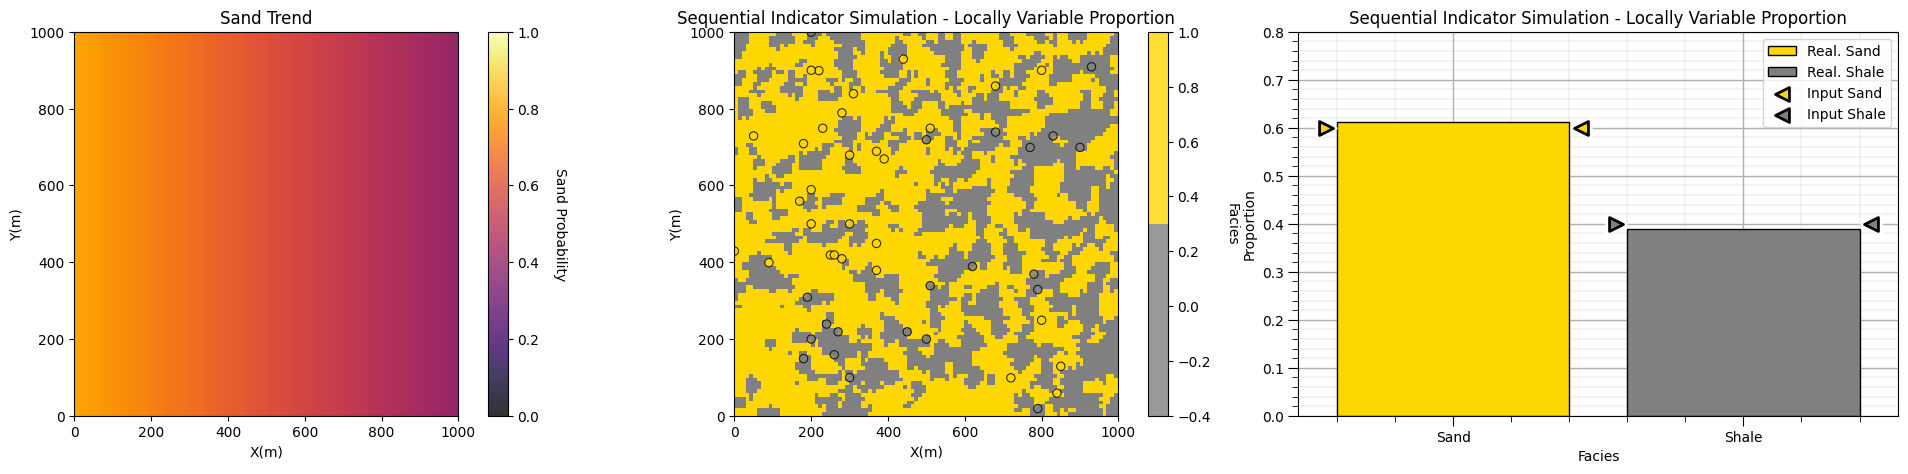

In [18]:
%%capture --no-display        

run_model = True                                               # run the simulation model

variomaj = 50.0; variomin = 50.0
varios = []                                                    # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # shale ind. vario.
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=0,hmaj1=variomaj,hmin1=variomin)) # sand ind. vario.
ndmin = 0; ndmax = 5                                           # minimum and maximum data for indicator kriging
nodmax = 5                                                     # maximum previously simulated nodes for indicator kriging

if run_model == True:
    sisim_trend = geostats.sisim(df,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf,trend=trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nreal=1,nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed = 73073,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,ktype=2,vario=varios)[0]

plt.subplot(131)
GSLIB.pixelplt_st(trend[:,:,1],xmin,xmax,ymin,ymax,xsiz,0.0,1.0,'Sand Trend','X(m)','Y(m)','Sand Probability',cmap)

plt.subplot(132)                                               # plot indicator simulation with trend
GSLIB.locpix_st(sisim_trend,xmin,xmax,ymin,ymax,xsiz,-.4,1.0,df,'X','Y','Facies',
                'Sequential Indicator Simulation - Locally Variable Proportion','X(m)','Y(m)','Facies',cmap_facies)

plt.subplot(133) 
prop = [np.average(sisim_trend.flatten()),1.0 - np.average(sisim_trend.flatten())]; color = ['gold','grey']
plt.bar(x=['Sand','Shale'],height=prop,color=color,edgecolor='black',label=['Real. Sand','Real. Shale'])
plt.ylabel('Proportion'); plt.xlabel('Facies'); 
plt.title('Sequential Indicator Simulation - Locally Variable Proportion');
plt.scatter([0.44],[gcdf[1]],color='gold',edgecolor='black',s=100,lw=2,marker='<',zorder=20,label='Input Sand')
plt.scatter([-0.44],[gcdf[1]],color='gold',edgecolor='black',s=100,lw=2,marker='>',zorder=20)
plt.scatter([0.44],[gcdf[1]],color='white',s=200,lw=2,marker='<',zorder=19)
plt.scatter([-0.44],[gcdf[1]],color='white',s=200,lw=2,marker='>',zorder=19)  
plt.scatter([1.44],[gcdf[0]],color='grey',edgecolor='black',s=100,lw=2,marker='<',zorder=20,label='Input Shale')
plt.scatter([0.56],[gcdf[0]],color='grey',edgecolor='black',s=100,lw=2,marker='>',zorder=20)
plt.scatter([1.44],[gcdf[0]],color='white',s=200,lw=2,marker='<',zorder=19)
plt.scatter([0.56],[gcdf[0]],color='white',s=200,lw=2,marker='>',zorder=19)
plt.legend(loc='upper right'); plt.ylim([0,0.8]); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.8, wspace=0.1, hspace=0.2); plt.show()

The trend is quite epic and we still match the input global proportions. We should take care to ensure that the global proportions in the trend honor the representative statistics (from declustering).  The above exercise was just a simple demo.

#### Comments

This was a basic demonstration of indicator kriging for categorical spatial estimation and continuous estimation by spatial category with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### The Author:

Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) 